In [2]:
from POP909_Dataset_master.data_process.processor import MidiEventProcessor
import pretty_midi as pyd
import numpy as np
from Code.RNN_file import *
from os import listdir
from tqdm import tqdm

In [2]:
res = np.zeros(128,int)
for folder in tqdm(listdir("Data")):
    for file in (listdir("Data/"+folder)):
        try:
            file_midi = pyd.PrettyMIDI("Data/"+folder+"/"+file)
            for instrument in file_midi.instruments:
                for note in instrument.notes:
                    res[note.pitch]+=1
        except:
            print(folder,file)

  0%|          | 0/21 [00:00<?, ?it/s]c:\Users\Vianey Darsel\AppData\Local\Programs\Python\Python39\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(
100%|██████████| 21/21 [02:18<00:00,  6.60s/it]


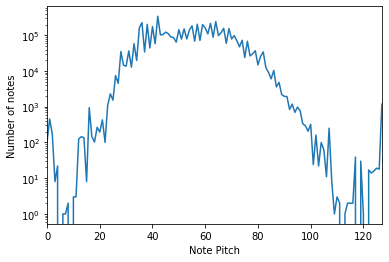

In [3]:
plt.plot(res)
plt.yscale('log')
plt.xlim(0,127)
plt.xlabel("Note Pitch")
plt.ylabel("Number of notes")
plt.show()

In [4]:
res_ser = pd.Series(res)

In [5]:
res_ser[res_ser>1000]

23     1083
24     2300
25     1532
26     7465
27     4537
       ... 
89     2189
90     1953
91     1931
93     1187
127    1179
Length: 71, dtype: int32

In [65]:
length_each = []
for folder in tqdm(listdir("Data")):
    for file in (listdir("Data/"+folder)):
        file_check = pyd.PrettyMIDI("Data/"+folder+"/"+file)
        length_each.append(file_check.time_to_tick(file_check.get_end_time()))

  0%|          | 0/21 [00:00<?, ?it/s]c:\Users\Vianey Darsel\AppData\Local\Programs\Python\Python39\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(
100%|██████████| 21/21 [02:33<00:00,  7.30s/it]


In [3]:
path_file_array = []
for file in (listdir("Data/beatles")):
    path_file_array.append("Data/beatles/"+file)

In [2]:
path_file_array = []
for folder in tqdm(listdir("Data")):
    for file in (listdir("Data/"+folder)):
        path_file_array.append("Data/"+folder+"/"+file)

100%|██████████| 21/21 [00:00<00:00, 7008.31it/s]


In [70]:
pd.Series(length_each,path_file_array).sort_values().head(11).sort_index()

Data/Daft Punk/Aerodynamic.mid            1920
Data/Daft Punk/Derezzed.mid                385
Data/Daft Punk/DigitalLove.mid            1920
Data/Daft Punk/EndofLine.mid              1538
Data/Daft Punk/TheGrid.mid                6529
Data/Daft Punk/TheSonOfFlyn.mid           6144
Data/beatles/HerMajesty.mid               8887
Data/james blunt/Carryyouhome (1).mid        0
Data/katy perry/Birthday.mid              4864
Data/pink floyd/Stop.mid                 10751
Data/queen/Procession.mid                 3600
dtype: int64

In [4]:
RNN = RNN_music(23,93,120)

In [5]:
loss_arr, music_arr = Adam(RNN,path_file_array,5.0,3,0.01)

  1%|          | 3/261 [02:38<4:47:52, 66.95s/it]

After 100 updates, loss: 0.771369659861839


  2%|▏         | 5/261 [03:23<2:55:05, 41.04s/it]

In [32]:
res = 0
for j in tqdm(range(len(path_file_array))):
    path = path_file_array[j]
    music_file = pyd.PrettyMIDI(path)
    end_tick = music_file.time_to_tick(music_file.get_end_time())
    res += int(end_tick//2500)

100%|██████████| 1220/1220 [02:29<00:00,  8.15it/s]


In [8]:
length_time=[]
for file_path in path_file_array:
    file_music = pyd.PrettyMIDI(file_path)
    length_time.append(file_music.get_end_time())

c:\Users\Vianey Darsel\AppData\Local\Programs\Python\Python39\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


In [10]:
pd.Series(length_time,path_file_array).sort_values()

Data/beatles/HerMajesty.mid                   22.217500
Data/beatles/MaggieMae.mid                    38.055774
Data/beatles/WildHoneyPie.mid                 51.428496
Data/beatles/DigIt.mid                        61.196667
Data/beatles/WhatYourDoing.mid                70.930071
                                                ...    
Data/beatles/ADayintheLife(2).mid            288.235220
Data/beatles/ImTheWalrus.mid                 293.646912
Data/beatles/WhileMyGuitarGentlyWeeps.mid    368.833333
Data/beatles/HeyJude (1).mid                 457.297404
Data/beatles/IWantYou.mid                    474.725000
Length: 261, dtype: float64

In [3]:
test = pyd.PrettyMIDI("Data/beatles/ADayInTheLife.mid")

In [14]:
test.time_to_tick(10)

2560

In [39]:
test.tick_to_time(1)

0.0009765625

In [42]:
test.time_to_tick(test.get_end_time())

206158

In [43]:
test.time_to_tick(0)

0

In [41]:
test.get_end_time()/test.tick_to_time(1)

206158.0

In [31]:
for i in range(len(test.instruments)):
    t_tempo, tempo = test.get_tempo_changes()
    t_tempo = np.concatenate([t_tempo,[test.get_end_time()]])
    for note in test.instruments[i].notes:
        t = note.start
        j=0
        tot = 0
        while (t<t_tempo[j]):
            tot+=((t_tempo[j+1]-t_tempo[j])*tempo[j]/60)
            j+=1
        tot += ((t-t_tempo[j])*tempo[j]/60)
        print(tot)
        set_notes_time.add(tot%1)

8.0125
8.0
8.0
9.0125
9.0
9.0
10.0125
10.0
10.0
11.0125
11.0
11.0
12.0125
12.0
12.0
13.0125
13.0
13.0
14.0125
14.0
14.0
15.0125
15.0
15.0
16.0125
16.0
16.0
17.0125
17.0
17.0
18.0125
18.0
18.0
19.0125
19.0
19.0
20.0125
20.0
20.0
21.0125
21.0
21.0
22.0125
22.0
22.0
23.0125
23.0
23.0
23.99375
24.0125
24.0
24.99375
25.0125
25.0
25.99375
26.0125
26.0
26.99375
27.0125
27.0
27.99375
28.0125
28.0
28.99375
29.0125
29.0
29.99375
30.0125
30.0
31.0125
30.99375
31.0
32.0
32.00625
32.00625
32.0125
33.0
33.00625
33.00625
33.0125
34.0
34.00625
34.00625
34.0125
35.0
35.00625
35.00625
35.0125
36.0
36.00625
36.00625
36.0125
37.0
37.00625
37.00625
37.0125
38.0
38.00625
38.00625
38.0125
39.0
39.00625
39.00625
39.0125
40.0
40.00625
40.0125
41.0
41.00625
41.0125
42.0
42.00625
42.0125
43.0
43.00625
43.0125
44.0
44.00625
44.0125
45.0
45.00625
45.0125
46.0
46.00625
46.0125
47.0
47.00625
47.0125
48.0125
48.0
48.0
49.0125
49.0
49.0
50.0125
50.0
50.0
51.0125
51.0
51.0
52.0125
52.0
52.0
53.0125
53.0
53.0
54.0125
54

In [26]:
arr_notes_time = np.array(list(set_notes_time))

In [30]:
1/8

0.125

In [28]:
np.sort(arr_notes_time)

array([0.        , 0.00416667, 0.00625   , 0.00625   , 0.00625   ,
       0.00833333, 0.01041667, 0.01041667, 0.0125    , 0.0125    ,
       0.0125    , 0.01458333, 0.01666667, 0.01666667, 0.01875   ,
       0.01875   , 0.02083333, 0.02083333, 0.02291667, 0.025     ,
       0.02708333, 0.02916667, 0.02916667, 0.03125   , 0.03333333,
       0.03333333, 0.03541667, 0.0375    , 0.04166667, 0.04166667,
       0.04375   , 0.04583333, 0.04791667, 0.04791667, 0.05      ,
       0.05208333, 0.05416667, 0.05833333, 0.06041667, 0.0625    ,
       0.06458333, 0.06458333, 0.06666667, 0.08125   , 0.08541667,
       0.0875    , 0.08958333, 0.09375   , 0.10625   , 0.11875   ,
       0.12916667, 0.14583333, 0.17083333, 0.17708333, 0.17916667,
       0.21041667, 0.23333333, 0.23541667, 0.25      , 0.27291667,
       0.29583333, 0.31041667, 0.3125    , 0.33958333, 0.34166667,
       0.34166667, 0.34375   , 0.34583333, 0.35625   , 0.35625   ,
       0.36041667, 0.36666667, 0.37083333, 0.375     , 0.37708

In [55]:
test.instruments[10]

Instrument(program=25, is_drum=True, name="Analog")

In [23]:
test.get_tempo_changes()

(array([0.]), array([120.]))

In [62]:
note = (test.instruments[0].notes[0])

In [64]:
inst = test.instruments[0]

In [66]:
inst.get_pitch_class_histogram()

array([ 42.,   0.,  42.,   0., 340.,   0.,  56.,  42.,   0., 126.,   0.,
       128.])

In [48]:
def convert_to_1D(analyze_file : pyd.PrettyMIDI, instr_index: list[int]):
    n_ticks = test.time_to_tick(test.get_end_time())+1
    res = np.zeros(n_ticks,int)
    for i in instr_index:
        for note in analyze_file.instruments[i].notes:
            tick_start = analyze_file.time_to_tick(note.start)
            tick_end = analyze_file.time_to_tick(note.end)
            for j in range(tick_start,tick_start+1):
                res[j]+=1
    return res

In [59]:
convert_to_1D(test,[2])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [46]:
def convert_to_2D(analyze_file : pyd.PrettyMIDI):
    n_ticks = test.time_to_tick(test.get_end_time())+1
    res = np.zeros((n_ticks,128),int)
    for i in range(len(analyze_file.instruments)):
        for note in analyze_file.instruments[i].notes:
            tick_start = analyze_file.time_to_tick(note.start)
            tick_end = analyze_file.time_to_tick(note.end)
            for j in range(tick_start,tick_end+1):
                res[j][note.pitch]+=1
    return res

In [91]:
test.instruments[0].notes[0].start*128/60

8.0125

In [49]:
(convert_to_2D(test))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
RNN_music()